<a href="https://colab.research.google.com/github/ReuelNixon/learn-pytorch/blob/main/01_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PyTorch end-to-end workflow.
1. Data (prepare and load)
2. Build model
3. Fitting the model to data (training)
4. Making predictions and evaluting a model (inference)
5. Saving and loading a model

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [2]:
# For device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using device: {device}')

Using device: cuda


## Data (prepare and load)

In [3]:
weight = 0.7
bias = 0.3

X = torch.arange(0, 1, 0.02).unsqueeze(dim=1)
X.to(device)

y = weight * X + bias
y.to(device)

X[:5], y[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

In [4]:
split = int(0.8 * len(X))

X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

X_train[:5], y_train[:5], X_test[:5], y_test[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]], device='cuda:0'),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]], device='cuda:0'),
 tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800]], device='cuda:0'),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160]], device='cuda:0'))

In [5]:
def plot_predictions(train_data=X_train.cpu(),
                     train_labels=y_train.cpu(),
                     test_data=X_test.cpu(),
                     test_labels=y_test.cpu(),
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  # Are there predictions?
  if predictions is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

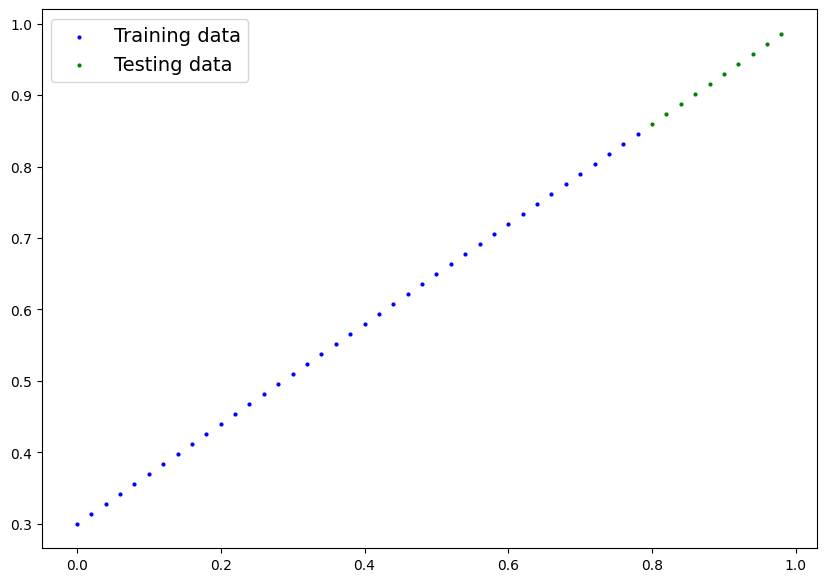

In [6]:
plot_predictions()

## Building a model

In [7]:
class LinearModel(nn.Module):
  def __init__(self):
    super().__init__()

    self.linear_layer = nn.Linear(in_features = 1, out_features = 1)

  def forward(self, x):
    return self.linear_layer(x)


model = LinearModel()
model.to(device)
model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.5216]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.5855], device='cuda:0'))])

## Training the model
- Loss function
- Optimizer
- Training loop
- Testing loop

In [8]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model.parameters(), lr = 0.01)

In [9]:
EPOCHS = 1000
for epoch in range(EPOCHS):
  model.train()
  # Training
  # 1. Forward Pass
  y_pred = model(X_train)

  # 2. Calculate Loss
  train_loss = loss_fn(y_pred, y_train)

  # 3. Optimizer Zero grad
  optimizer.zero_grad()

  # 4. Back propagation
  train_loss.backward()

  # 5. Optimizer step
  optimizer.step()


  # Testing
  model.eval()
  with torch.inference_mode():
    test_pred = model(X_test)
    test_loss = loss_fn(test_pred, y_test)

  if epoch % 100 == 0:
    print(f'Epoch: {epoch} | Train Loss: {train_loss} | Test Loss: {test_loss}')


Epoch: 0 | Train Loss: 0.21596436202526093 | Test Loss: 0.11331415176391602
Epoch: 100 | Train Loss: 0.02093186229467392 | Test Loss: 0.04810917004942894
Epoch: 200 | Train Loss: 0.004470284562557936 | Test Loss: 0.010994470678269863
Epoch: 300 | Train Loss: 0.004470284562557936 | Test Loss: 0.010994470678269863
Epoch: 400 | Train Loss: 0.004470284562557936 | Test Loss: 0.010994470678269863
Epoch: 500 | Train Loss: 0.004470284562557936 | Test Loss: 0.010994470678269863
Epoch: 600 | Train Loss: 0.004470284562557936 | Test Loss: 0.010994470678269863
Epoch: 700 | Train Loss: 0.004470284562557936 | Test Loss: 0.010994470678269863
Epoch: 800 | Train Loss: 0.004470284562557936 | Test Loss: 0.010994470678269863
Epoch: 900 | Train Loss: 0.004470284562557936 | Test Loss: 0.010994470678269863


In [10]:
model.state_dict(), (weight, bias)

(OrderedDict([('linear_layer.weight', tensor([[0.6960]], device='cuda:0')),
              ('linear_layer.bias', tensor([0.3060], device='cuda:0'))]),
 (0.7, 0.3))

## Making predictions and evaluting a model (inference)

In [11]:
model.eval()

with torch.inference_mode():
  y_preds = model(X_test)

y_preds, y_test

(tensor([[0.8628],
         [0.8768],
         [0.8907],
         [0.9046],
         [0.9185],
         [0.9324],
         [0.9464],
         [0.9603],
         [0.9742],
         [0.9881]], device='cuda:0'),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]], device='cuda:0'))

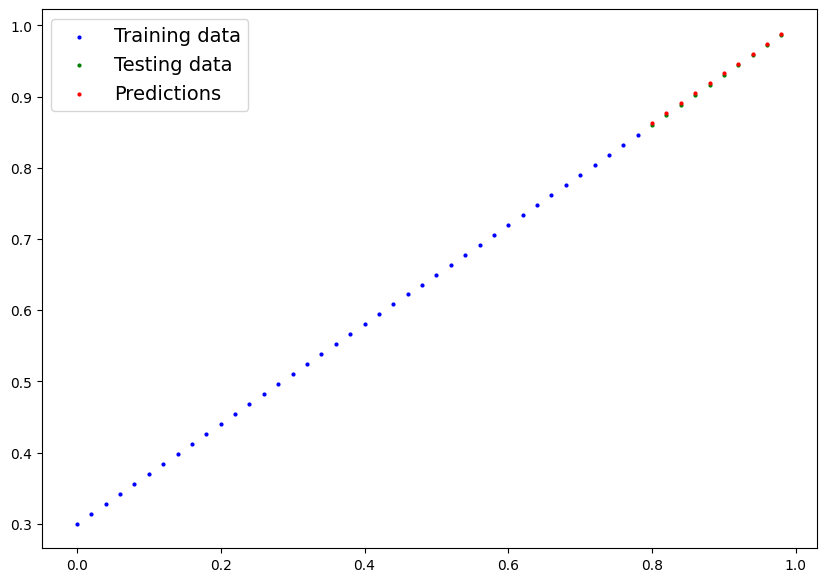

In [12]:
plot_predictions(predictions=y_preds.cpu())

## Saving and loading a model

In [13]:
from pathlib import Path

DIR_PATH = Path('models')
DIR_PATH.mkdir(parents=True, exist_ok=True)

MODEL_PATH = DIR_PATH / 'model.pth'

In [14]:
print(f"Saving model to: {MODEL_PATH}")
torch.save(obj=model.state_dict(), f=MODEL_PATH)

Saving model to: models/model.pth


In [15]:
loaded_model = LinearModel()
loaded_model.load_state_dict(torch.load(MODEL_PATH))
loaded_model.to(device)

LinearModel(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [16]:
model.eval()

with torch.inference_mode():
  y_preds_loaded = loaded_model(X_test)

y_preds == y_preds_loaded

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')